<h1>Zadanie 1 (Analiza danych) - rozwiązanie</h1>

<b>Imię i nazwisko autora: Michal Jachman</b>

Analizowany przeze mnie zbiór danych to lista projektów ze strony crowdfundingowej KickStarter. Zbiór zawiera 378660 pozycji.Dane pochodzą ze strony https://www.kaggle.com/kemical/kickstarter-projects. Najnowsza aktualizacja danych pochodzi z dnia 08.02.2018.

In [722]:
import pandas
#tworzenie dataframe na bazie listy
df=pandas.read_csv(r"ks-projects-201801.csv")
#pokazanie jako przykład pierwszych pięciu elementów listy
display(df.head(5))

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [268]:
#grupowanie kategorii według liczby projektów, sortowanie w kolejności malejącej
df1=df.groupby('main_category')['ID'].count().reset_index(name="count").sort_values(by=['count'],ascending=False,ignore_index=True)



Kategorie według liczby projektów

In [269]:
display(df1)

,main_category,count
0,Film & Video,63585
1,Music,51918
2,Publishing,39874
3,Games,35231
4,Technology,32569
5,Design,30070
6,Art,28153
7,Food,24602
8,Fashion,22816
9,Theater,10913


<AxesSubplot:title={'center':'Udział procentowy liczby projektów według kategorii'}, ylabel='count'>

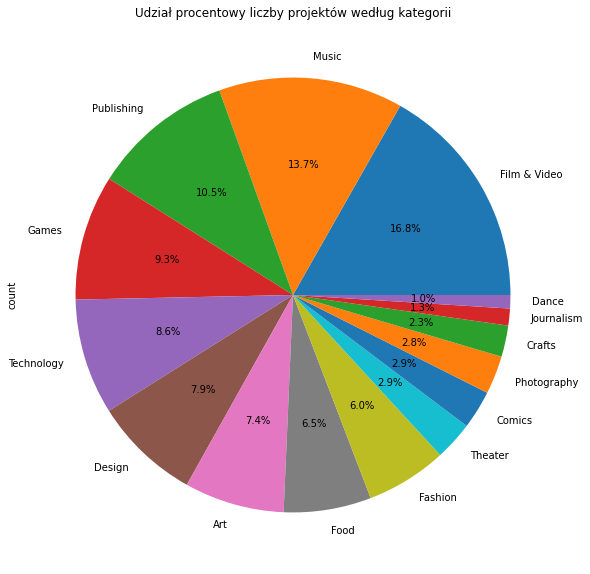

In [266]:
import matplotlib

df2=df1.copy()
df2.set_index('main_category',inplace=True)
#rysowanie wykresu przedstawiającego udział procentowy liczby projektów według kategorii
df2.plot.pie(y='count', title="Udział procentowy liczby projektów według kategorii", legend=False, autopct='%1.1f%%',
             figsize=(10, 10))



In [270]:
#grupowanie projektów według statusu
df3=df.groupby('state')['ID'].count().reset_index(name="count").sort_values("count",ascending=False,ignore_index=True)

print(df3)

        state   count
0      failed  197719
1  successful  133956
2    canceled   38779
3   undefined    3562
4        live    2799
5   suspended    1846


<AxesSubplot:title={'center':'Udział procentowy liczby projektów według statusu'}, ylabel='count'>

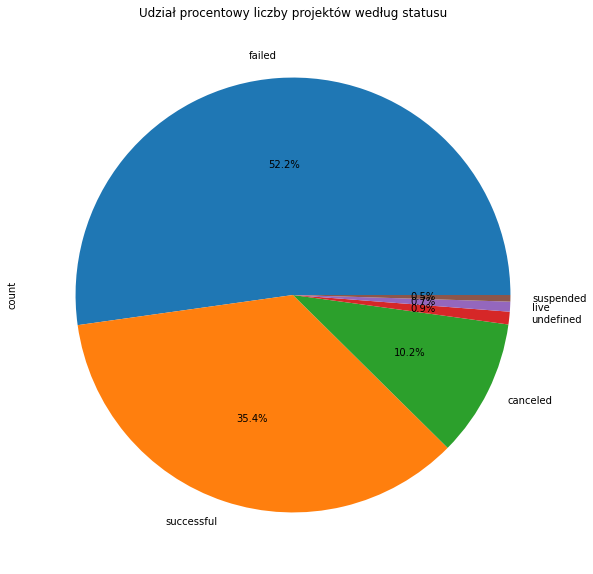

In [276]:
df3=df3.copy()
#rysowanie wykresu przedstawiającego udział procentowy liczby projektów według ich statusu
df3.plot.pie(y='count', title="Udział procentowy liczby projektów według statusu", legend=False, autopct='%1.1f%%',
             figsize=(10, 10))


In [726]:
import datetime as dt
df4=df.copy()
#konwersja kolumny zawierającej datę do formatu daty
df4.index=pandas.to_datetime(df4['launched'],format='%Y-%m')
#grupowanie miesięcy według liczby zbiórek rozpoczętych w danym miesiącu
df4=df4.groupby(pandas.Grouper(freq='M'))['ID'].count().reset_index(name="count").sort_values("count",ascending=True,ignore_index=True)
#odrzucenie miesięcy, w których kickstarter jeszcze nie istniał oraz odrzucenie ostatniego miesiąca
#który podczas ostatniej aktualizacji jeszcze nie dobiegł końca
df4=df4.loc[df4['count']>7].drop(df4.index[576]) 
display(df4)

,launched,count
471,2009-04-30,19
472,2009-05-31,74
473,2009-06-30,75
474,2009-07-31,78
475,2009-08-31,115
...,...,...
571,2015-05-31,6970
572,2014-08-31,7430
573,2015-04-30,7470
574,2015-02-28,7591


(14335.0, 17531.0)

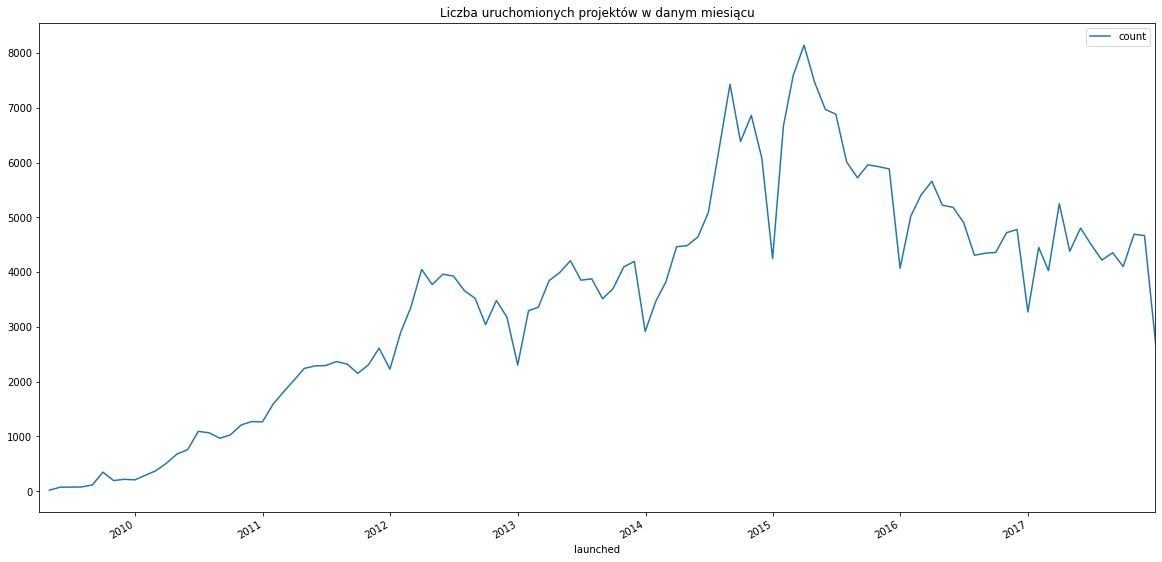

In [556]:
#rysowanie wykresu liczba uruchomionych projektów w danym miesiącu w latach zbierania danych
df4.plot(x='launched',y='count',figsize=(20, 10),title='Liczba uruchomionych projektów w danym miesiącu').set_xlim([dt.date(2009, 4, 1), dt.date(2017, 12, 31)],)

In [659]:
df5=df.copy()
df6=df.copy()

#tworzenie zbioru danych z podziałem na zbiórki zakończone sukcesem i porażką według kategorii
#wyłączyłem z zestawienia zbiórki o statusach live, suspended i undefined gdyż nie da się ustalić ich sukcesu ani porażki

df5=df5.loc[df5['state']=='successful']
df6=df6.loc[(df6['state']=='failed') | (df6['state']=='canceled')]

df5=df5.groupby('main_category')['ID'].count().reset_index(name="successful")
df6=df6.groupby('main_category')['ID'].count().reset_index(name="failed/cancelled")

#połączenie dwóch zbiorów w jeden
df7=pandas.concat([df5.set_index('main_category'),df6.set_index('main_category')], axis=1, join='inner')


print(df7)

               successful  failed/cancelled
main_category                              
Art                  6562              8608
Comics               3555              3005
Crafts                887              3552
Dance                1787               847
Design               4493              6157
Fashion              2556              8013
Film & Video        13105             15800
Food                 2611              5774
Games                6267              8351
Journalism            540              1808
Music               16455             14459
Photography          1809              4346
Publishing           7706             15406
Technology           2149              6508
Theater              4582              2391


<AxesSubplot:title={'center':'Procent projektów zakończonych sukcesem dla danej kategorii'}, xlabel='main_category'>

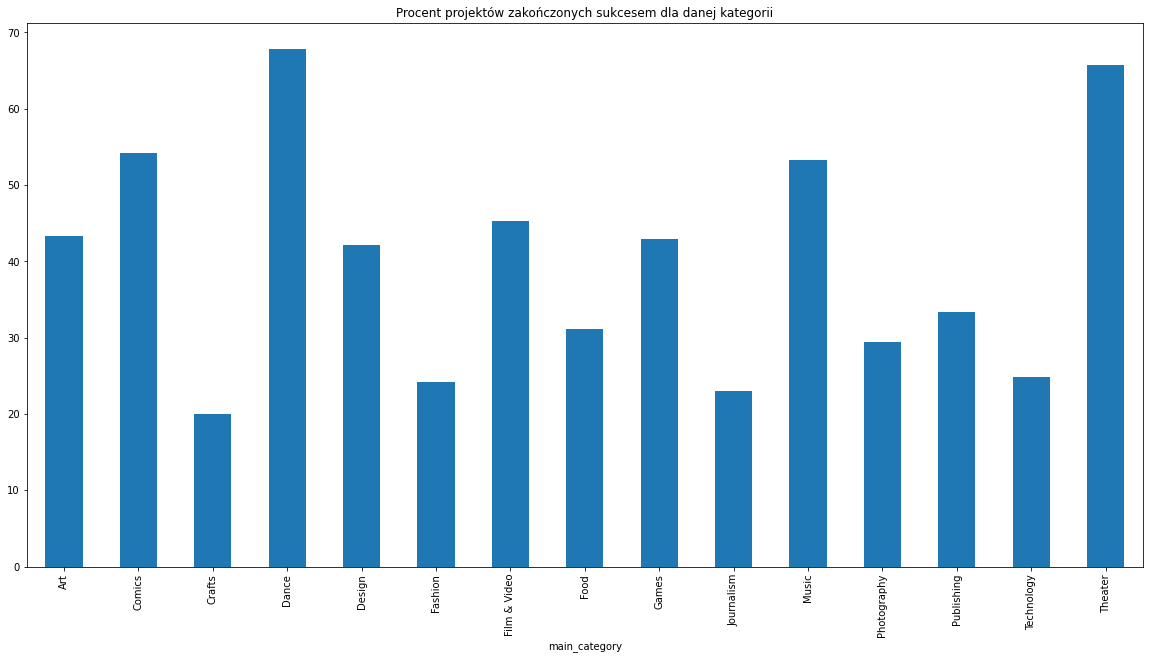

In [724]:
#obliczanie jaki procent każdej kategorii stanowią projekty zakończone sukcesem.
df8=df7['success_rate_percentage']=100*df7['successful']/(df7['successful']+df7['failed/cancelled'])

#rysowanie wykresu ukazującego procent projektów został zakończony sukcesem z podziałem na kategorie
df8.plot(kind="bar",y="success_rate_percentage",figsize=(20, 10),title='Procent projektów zakończonych sukcesem dla danej kategorii')


In [729]:
df9=df.copy()
#obliczanie średniej środków zadeklarowanych w zbiórce z podziałem na kategorie
df9=df.groupby('main_category')['usd_goal_real'].mean().reset_index(name="average_goal")
#obliczanie średniej faktycznie uzbieranych środków z podziałem na kategorie
df10=df.groupby('main_category')['usd_pledged_real'].mean().reset_index(name="average_pledged")
#sortowanie kolejności malejącej
df9=df9.sort_values("average_goal",ascending=False,ignore_index=True)
#połączenie zbioru średniej wymaganych środków i średniej wpłaconych środków z tabel w jedną
df11=pandas.concat([df9.set_index('main_category'),df10.set_index('main_category')], axis=1, join='inner')


display(df11)




,average_goal,average_pledged
main_category,,
Technology,102288.542839,21151.171165
Journalism,86003.395014,2615.702568
Film & Video,82625.292254,6157.978427
Food,49039.620804,5113.669716
Games,44923.741408,21041.903140
Design,41871.388591,24417.034698
Art,39198.575879,3220.986968
Theater,27088.321275,4005.918099
Publishing,24798.240254,3349.951931


<AxesSubplot:title={'center':'Średnia wymaganych i średnia faktycznie uzyskancyh środków (USD) dla każdej kategorii'}, xlabel='main_category'>

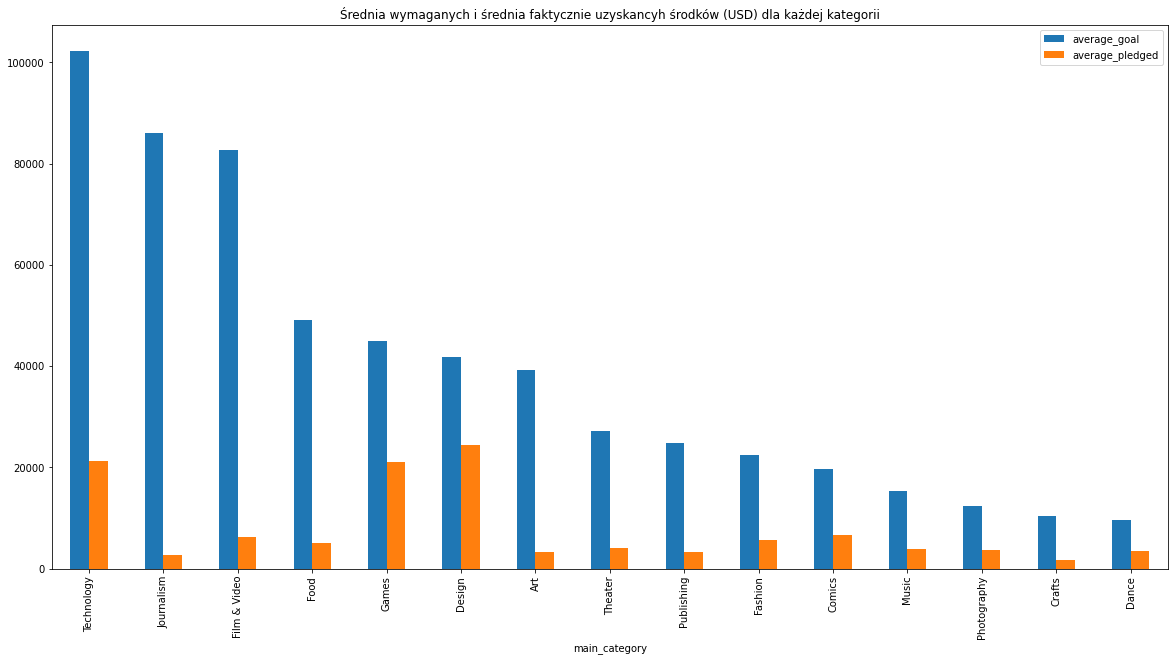

In [706]:
#rysowanie wykresu ukazującego średnią zadeklarowanych i średnią faktycznie uzbieranych środków (USD) dla każdej kategorii
df11.plot(kind="bar",figsize=(20, 10),title='Średnia zadeklarowanych i średnia faktycznie uzyskancyh środków (USD) dla każdej kategorii')